# Illustrative example

Imagine you are the marketing manager for a firm that is planning to introduce a new product. You need to estimate the first-year net profit from this product, which might depend on:

- Sales volume in units
- Price per unit (also called "Selling price")
- Unit cost
- Fixed costs

Net profit will be calculated as $Net Profit = Sales Volume* (Selling Price - Unit cost) - Fixed costs$.  Fixed costs (accounting for various overheads, advertising budget, etc.) are known to be \$ 120,000, which we assume to be deterministic. All other factors, instead, involve some uncertainty: *sales volume* (in units) can cover quite a large range, the *selling price* per unit will depend on competitor actions, which are hard to predict, and *unit costs* will also vary depending on vendor prices and production experience, for example.

## 1. Unit sales and unit price

Based on a hypothetical market research you have done, you have beliefs that there are equal chances for the market to be `slow`, `normal`, or `hot`:

- In a "slow" market, you expect to sell 50,000 units at an average selling price of \$11.00 per unit
- In a "normal" market, you expect to sell 75,000 units, but you'll likely realize a lower average selling price of \$10.00 per unit
- In a "hot" market, you expect to sell 100,000 units, but this will bring in competitors, who will drive down the average selling price to \$8.00 per unit

<div class="alert alert-info">
Calculate the average units and the unit price that you expect to sell, which depend on the market state. Use the assumptions above to compute the expected quantity of products and their expected unit price. 
</div>

In [1]:
import numpy as np
units = np.array([50000, 75000, 100000])
prices = np.array([11.0, 10.0, 8.0])
average_unit =  units.mean()
average_price = prices.mean()
print("average unit: %.0f" %(average_unit))
print("average_price: %.2f" %(average_price))

average unit: 75000
average_price: 9.67


<div class="alert alert-info">
Write a function named `calNetProfit` to calculate the Net Profit using the average of sales volume, the average of selling price and the average of unit cost.
</div>

In [2]:
def calNetProfit(average_unit, average_price, average_unitcost, fixed_cost):
    return average_unit*(average_price-average_unitcost)-fixed_cost

average_unitcost = 6.50
fixed_cost = 120000
net_profit = calNetProfit(average_unit,average_price,average_unitcost,fixed_cost)
print("Net profit: %.0f$" %(net_profit))

Net profit: 117500$


<div class="alert alert-info">
Verify the warning message of Dr. Sam Savage by calculating the error of our estimated Net Profit using averages only. Recall that the true value is roughly \$93,000, so we are interested in:
<ul></ul>

$$ error = \frac{your\_value - true\_value}{true\_value}$$

<ul></ul>
Note also we are interested in displaying the error as a percentage.
<ul></ul>
Looking at the error we make, do you think that we can use the current model that only relies on averages?
</div>

In [3]:
true_net_profit = 93000
error = (net_profit - true_net_profit) / true_net_profit
print("Error in percentage: %.3f%%" %(error * 100))

Error in percentage: 26.344%


<div class="alert alert-info">
Write a function named `get_sales_volume_price` that returns the sales volume and price based on the market scenario. In particular, the scenario can get one of three values:
<ul>
  <li>0: Slow market</li>
  <li>1: Normal market</li>
  <li>2: Hot market</li>
</ul>  

The return value is a tuple in the form: `(sales_volume, price)`
</div>

In [5]:
# Get sales volume and  price based on market scenario
# the function returns a tuple of (sales_volume, price)
def get_sales_volume_price(scenario):
    # Slow market
    if scenario == 0:
        return (50000,11.0)
    # Normal market
    if scenario == 1:
        return (75000, 10.0)
    # Hot market
    if scenario == 2:
        return (100000, 8.0)

<div class="alert alert-info">
Run 100,000 Monte Carlo simulations and calculate the average net profit they produce. Then, compare the result to the "average model" we used in the previous questions (the one we called "flawed" model).

In [7]:
import random
total = np.array([])
num_simulation = 100000
for i in range(0,num_simulation):
    unit_cost = random.uniform(5.5, 7.5) #the unit costs may vary between $5.50 to $7.50
    market_scenario = random.randint(0, 2) #to get our market scenario 0, 1 or 2
    sales_volume, price = get_sales_volume_price(market_scenario)
    net_profit = calNetProfit(sales_volume, price, unit_cost, fixed_cost)
    total = np.append(total, net_profit)

print("Average net profit: %.3f$" %total.mean())

#evaluating the error on the Monte Carlo Simulation Approach
errorMCS = (total.mean() - true_net_profit) / true_net_profit
print("Error in percentage: %.3f%%" %(np.abs(errorMCS * 100)))

val = np.zeros(len(total))
err = np.zeros(len(total))
val[0] = total[0]
err[0] = np.abs((total[0]-true_net_profit)/true_net_profit*100)

for i in range(1, len(total)):
    val[i] = (total[i]+val[i-1]) 
    x = val[i]/(i+1) #evaluating the sum of all profits until this simulation and mean until now
    err[i] = np.abs((x-true_net_profit)/true_net_profit)

Average net profit: 92680.001$
Error in percentage: 0.344%


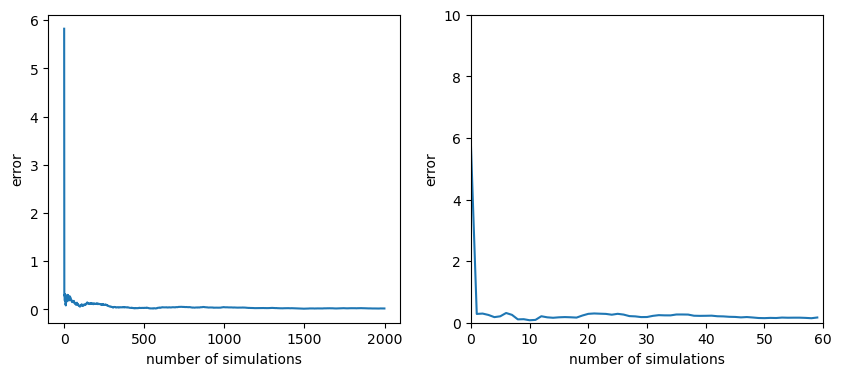

In [12]:
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(np.arange(2000), err[0:2000])
plt.ylabel("error")
plt.xlabel("number of simulations")

plt.subplot(122)
plt.plot(np.arange(60), err[0:60])
plt.ylabel("error")
plt.xlabel("number of simulations")
plt.axis([0,60,0,10])
plt.show()

<div class="alert alert-success">
As we can see, increasing the number of simulations allows to reach to the true value of the netProfit. In the example above, we performed 100k simulations and this allowed us to reach an error of less tha 0.5%. In the plot above, we plotted how the error decreases over time. It's really interesting to see how the error reaches a <i>reasonable</i> result in less than 20 iterations (<i>plot below</i>) and from that iteration onwards, the error remains low and pretty constant (<i>plot above</i>).
</div>